In [80]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path

In [81]:
fantasy_file = Path("fantasy_merged_7_17.csv")

In [82]:
fantasy_stats = pd.read_csv(fantasy_file)
p1_clean = fantasy_stats.fillna(0)
p1_clean


,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,Rec,RecYds,YR,RecTD,Fmb,FL,PPR,PlayerID,PosRk,Year
0,1,Todd Gurley,LAR,RB,23,15,15,0,0,0,...,64,788,12.31,6,5,2,383.3,GurlTo01,1.0,2017
1,2,Russell Wilson,SEA,QB,29,16,16,339,553,3983,...,0,0,0.00,0,14,3,347.9,WilsRu00,1.0,2017
2,3,Le'Veon Bell,PIT,RB,25,15,15,0,0,0,...,85,655,7.71,2,3,2,341.6,BellLe00,2.0,2017
3,4,Alvin Kamara,NOR,RB,22,16,3,0,0,0,...,81,826,10.20,5,1,1,320.4,KamaAl00,3.0,2017
4,5,Antonio Brown,PIT,WR,29,14,14,0,0,0,...,101,1533,15.18,9,4,0,310.3,BrowAn04,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,573,Nate Sudfeld,DET,QB,29,2,0,0,0,0,...,0,0,0.00,0,0,0,-0.4,SudfNa00,80.0,2022
3384,574,KaVontae Turpin,DAL,WR,26,17,0,0,0,0,...,1,9,9.00,0,3,2,-0.4,TurpKa00,218.0,2022
3385,575,Chad Henne,KAN,QB,37,3,0,0,2,0,...,0,0,0.00,0,1,0,-0.5,HennCh01,81.0,2022
3386,576,C.J. Beathard,JAX,QB,29,4,0,7,11,35,...,0,0,0.00,0,0,0,-1.0,BeatC.00,82.0,2022


In [83]:
p1_sum = p1_clean.groupby("FantPos").sum()["PPR"]

/var/folders/j8/8748_dx152l8zz130b5lvd740000gn/T/ipykernel_13298/3754146743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p1_sum = p1_clean.groupby("FantPos").sum()["PPR"]


In [84]:
p1_sum


FantPos
QB     52953.1
RB     73815.8
TE     37636.6
WR    106992.1
Name: PPR, dtype: float64

In [85]:
p1_sum = p1_sum.reset_index()

In [86]:
p1_sum

,FantPos,PPR
0,QB,52953.1
1,RB,73815.8
2,TE,37636.6
3,WR,106992.1


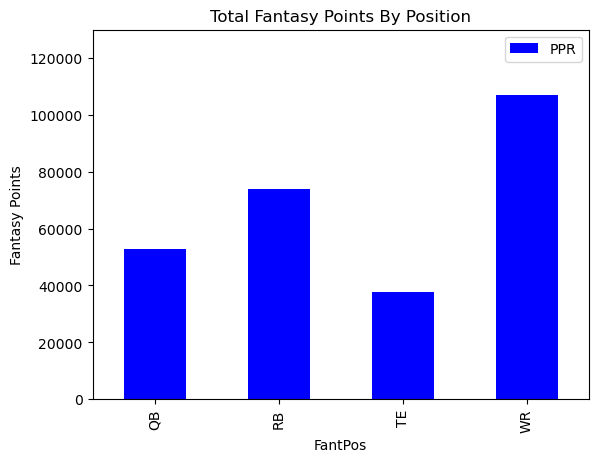

In [87]:
plot1 = p1_sum.plot(kind = "bar", x= "FantPos", y="PPR", color="blue", ylim = (0, 130000), 
                         ylabel = "Fantasy Points", title = "Total Fantasy Points By Position")

In [88]:
p1_avg = p1_clean.groupby("FantPos").mean()["PPR"]

/var/folders/j8/8748_dx152l8zz130b5lvd740000gn/T/ipykernel_13298/1442655499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p1_avg = p1_clean.groupby("FantPos").mean()["PPR"]


In [89]:
p1_avg

FantPos
QB    114.617100
RB     77.456243
TE     55.675444
WR     82.491981
Name: PPR, dtype: float64

In [90]:
p1_avg = p1_avg.reset_index()
p1_avg


,FantPos,PPR
0,QB,114.617100
1,RB,77.456243
2,TE,55.675444
3,WR,82.491981


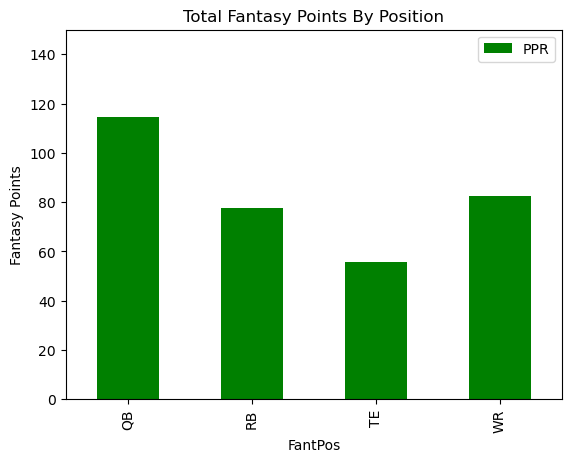

In [93]:
plot2 = p1_avg.plot(kind = "bar", x= "FantPos", y="PPR", color="green", ylim = (0, 150), 
                         ylabel = "Fantasy Points", title = "Total Fantasy Points By Position")

In [34]:
p2 = p1_clean.groupby("FantPos").mean()["Age"]

/var/folders/j8/8748_dx152l8zz130b5lvd740000gn/T/ipykernel_13298/2829375959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p2 = p1_clean.groupby("FantPos").mean()["Age"]


In [35]:
p2

FantPos
QB    28.417749
RB    25.437566
TE    26.465976
WR    25.705474
Name: Age, dtype: float64

In [36]:
p2_df = p2.reset_index()

In [37]:
p2_df

,FantPos,Age
0,QB,28.417749
1,RB,25.437566
2,TE,26.465976
3,WR,25.705474


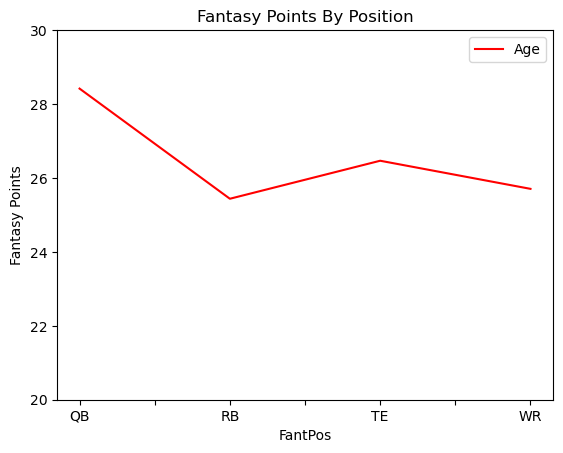

In [94]:
plot2 = p2_df.plot(kind = "line", x= "FantPos", y="Age", color="red", ylim = (20, 30), 
                         ylabel = "Fantasy Points", title = "Fantasy Points By Position")